# LOESS
This notebook illustrates the use of the _pyloess_ package 
This notebook illustrates a NumPy implementation of the LOESS locally-weighted linear regression as defined by [NIST](https://www.itl.nist.gov/div898/handbook/pmd/section1/dep/dep144.htm)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pyloess.Loess import Loess

%matplotlib inline

Define the default chart size for this notebook.

In [4]:
plt.rcParams['figure.figsize'] = [10, 5]

### Generate a sample signal
Note that the *x* coordinates are sampled from a uniform random number generator and scaled appropriately. This simulates an irregularly sampled signal.

In [5]:
x_noise = np.sort(np.random.sample(200) * 4.0 * math.pi) # np.arange(0, 2 * math.pi, math.pi / 60)
y_signal =  2 * np.sin(x_noise)
y_noise = y_signal + np.random.normal(0,0.5,x_noise.shape[0])

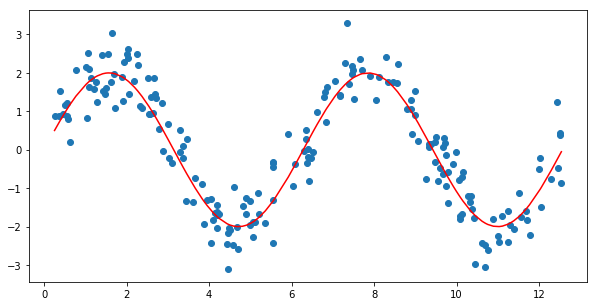

In [6]:
plt.scatter(x_noise, y_noise)
plt.plot(x_noise, y_signal, "r")

### The Tricubic Weighing Function


In [7]:
def tricubic(x):
    if x <= -1.0 or x >= 1.0:
        return 0.0
    else:
        return math.pow(1.0 - math.pow(abs(x), 3), 3)

## Signal smoothing with LOESS

In [8]:
xx = np.arange(start=0.0, stop=4.0 * math.pi, step=4.0 * math.pi / 100.0, dtype=float)

In [9]:
loess = Loess(x_noise, y_noise)

In [10]:
yy = np.zeros_like(xx)

In [11]:
k = 30

In [12]:
for i in range(len(xx)):
    yy[i] = loess.estimate(xx[i], window=k)

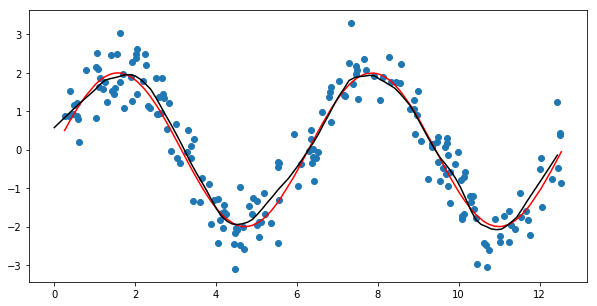

In [13]:
plt.scatter(x_noise, y_noise)
plt.plot(x_noise, y_signal, "r")
plt.plot(xx, yy, "k")

## The tricubic weighting function
This function is used to weigh the distances between a point to all points in the nearest window of size _k_.

In [14]:
def tricubic(x):
    y = np.zeros_like(x)
    idx = (x >= -1) & (x <= 1)
    y[idx] = np.power(1.0 - np.power(np.abs(x[idx]), 3), 3)
    return y

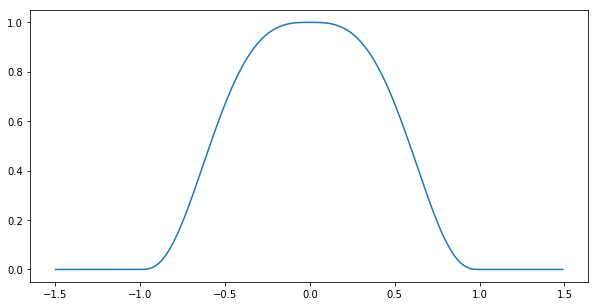

In [18]:
x = np.arange(-1.5, 1.5, 0.01)
y = tricubic(x)
plt.plot(x, y)